In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
inspector = inspect(engine)

In [11]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


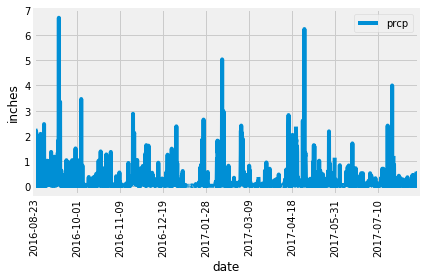

In [12]:
#Design query to first determine the latest year in the measurement table
latest_date_year = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

#Design a query to retrieve the last 12 months from the latest_date_year of precipitation data
prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.date <= '2017-08-23').\
    order_by(Measurement.date).all()

#Create dataframe from precipitation query and drop null values
prcp_data_df = pd.DataFrame(prcp_data, columns=['date', 'prcp'])
prcp_data_df.dropna()


#Plot precipitation for last 12 months
prcp_data_df.set_index('date', inplace=True)
prcp_data_df.plot()
plt.xticks(rotation=90)
plt.ylabel('inches')
plt.tight_layout()
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [13]:
#Calculate the date 1 year ago from the last data point in the database

#Find the year from the last data point in the database
last_date_year = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
date = dt.datetime(2017, 8, 23)

#Calculate date 1 year ago from the last data point in the database
year_ago = date - timedelta(days=365)
print(year_ago)


2016-08-23 00:00:00


In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data

measurement_csv = "Resources/hawaii_measurements.csv"
precip_data_df = pd.read_csv(measurement_csv)

precip_data_stat_df = precip_data_df['prcp']

precip_data_stat_df.describe()

count    18103.000000
mean         0.160644
std          0.468746
min          0.000000
25%          0.000000
50%          0.010000
75%          0.110000
max         11.530000
Name: prcp, dtype: float64

In [15]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Measurement.station).\
    order_by(Measurement.station).distinct().count()

stations


9

In [27]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


#Design queries for min, max, and avg temperatures for most active station

stations_min = session.query(Measurement.station, func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').\
    group_by(Measurement.station).all()

stations_max = session.query(Measurement.station, func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').\
    group_by(Measurement.station).all()

stations_avg = session.query(Measurement.station, func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').\
    group_by(Measurement.station).all()

#Display min, max, and avg temp values for most active station

print(stations_min)

print(stations_max)

print(stations_avg)



[('USC00519281', 54.0)]
[('USC00519281', 85.0)]
[('USC00519281', 71.66378066378067)]


No handles with labels found to put in legend.


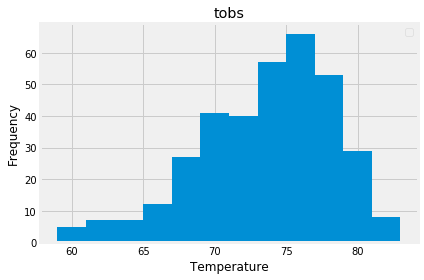

In [18]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#Find latest date from measurement table
last_date_year = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
date = dt.datetime(2017, 8, 23)

#Calculate the date equivalent to 12 months from the latest date in the data
year_ago = date - timedelta(days=365)

#Design query for temperature observation values for station USC00519281 for the last 12 months
tobs_data = session.query(Measurement.tobs).\
    filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.date <= '2017-08-23').\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date).all()


#Create dataframe from temperature observation query and drop null values
tobs_data_df = pd.DataFrame(tobs_data, columns=['tobs'])
tobs_data_df.dropna()


#Plot temperature observation data for station USC00519281 for last 12 months
tobs_data_df.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.tight_layout()
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


## Bonus Challenge Assignment

In [19]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [28]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

def calc_temps(start_date, end_date):
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

print(calc_temps('2011-02-28', '2011-03-05'))


[(61.0, 69.75510204081633, 75.0)]


C:\Users\siris\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.


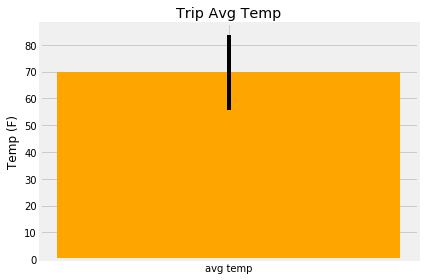

In [46]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

prev_year_temp_val = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= '2011-02-28').filter(Measurement.date <= '2011-03-05').all()


prev_year_temp_val_df = pd.DataFrame(prev_year_temp_val, columns=['min temp', 'avg temp', 'max temp'])

x_value = "avg temp"
y_value = prev_year_temp_val_df['avg temp']
error = [prev_year_temp_val_df['max temp'] - prev_year_temp_val_df['min temp']]

#Plot temperature observation data for station USC00519281 for last 12 months
plt.bar(x_value, y_value, color='orange', yerr=error)
plt.title('Trip Avg Temp')
plt.ylabel('Temp (F)')
plt.tight_layout()
plt.grid(True)
plt.show()



In [22]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation




In [23]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [24]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [25]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [26]:
# Plot the daily normals as an area plot with `stacked=False`
